# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Karen Hanna Aprilia
- **Email:** karen.hanna1318@gmail.com
- **ID Dicoding:** karen_hanna_IHX6

## Menentukan Pertanyaan Bisnis

- Daerah mana yang paling bersih dan paling berpolusi berdasarkan perhitungan Indeks Standar Pencemar Udara (ISPU) dalam 5 tahun (2013-2017)?
- Bagaimana tren Indeks Standar Pencemar Udara (ISPU) masing-masing polutan di setiap daerah?

Perhitungan ISPU didasarkan pada pedoman :
- https://aqihub.info/indices/indonesia
- Peraturan Menteri Lingkungan Hidup dan Kehutanan nomor 14 tahun 2020 tentang Indeks Standar Pencemar Udara

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Mengimport data air quality 12 station
aotizhongxin_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Changping_20130301-20170228.csv")
dingling_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Wanliu_20130301-20170228.csv")
wangshouxigong_aq_df = pd.read_csv("https://raw.githubusercontent.com/Karen1318/air_quality/main/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [3]:
# Menggabungkan data air quality 12 station
all_file = [aotizhongxin_aq_df, changping_aq_df, dingling_aq_df, dongsi_aq_df, guanyuan_aq_df, gucheng_aq_df, huairou_aq_df, nongzhanguan_aq_df, shunyi_aq_df, tiantan_aq_df, wanliu_aq_df, wangshouxigong_aq_df]

all_aq_df = pd.concat(all_file, ignore_index=True)

# Membuang variabel yang tidak diperlukan saat analisis
all_aq_df.drop(all_aq_df[['No', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']], axis=1, inplace=True)

all_aq_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong


**Insight:**
- Terdapat 12 file berisikan data quality air dari bulan Maret 2013 hingga Februari 2017 di setiap station yang dilaporkan tiap jam.
- Terdapat 6 data variabel polutan yang dapat dijadikan indikator tingkat polusi udara, yaitu PM2.5, PM10, SO2, NO2, CO, O3.

### Assessing Data

In [4]:
# Cek tipe data
all_aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  station  420768 non-null  object 
dtypes: float64(6), int64(4), object(1)
memory usage: 35.3+ MB


In [5]:
# Cek missing value per station
missing_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.isna().sum())
missing_value_per_station

<ipython-input-5-6aa43ce88108>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.isna().sum())


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station
station,,,,,,,,,,,
Aotizhongxin,0,0,0,0,925,718,935,1023,1776,1719,0
Changping,0,0,0,0,774,582,628,667,1521,604,0
Dingling,0,0,0,0,779,656,730,1234,2012,1214,0
Dongsi,0,0,0,0,750,553,663,1601,3197,664,0
Guanyuan,0,0,0,0,616,429,474,659,1753,1173,0
Gucheng,0,0,0,0,646,381,507,668,1401,729,0
Huairou,0,0,0,0,953,777,980,1639,1422,1151,0
Nongzhanguan,0,0,0,0,628,440,446,692,1206,506,0
Shunyi,0,0,0,0,913,548,1296,1365,2178,1489,0


In [6]:
# Cek duplicate value per station
duplicate_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.duplicated().sum())
duplicate_value_per_station

<ipython-input-6-3f7afe1972ae>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.duplicated().sum())


,0
station,
Aotizhongxin,0
Changping,0
Dingling,0
Dongsi,0
Guanyuan,0
Gucheng,0
Huairou,0
Nongzhanguan,0
Shunyi,0


**Insight:**
- Tipe data untuk tanggal, bulan, tahun masih terpisah-pisah dalam 3 kolom dan bertipe data integer.
- Terdapat banyak sekali missing value untuk tiap variabel polutan.
- Tidak terdapat duplikasi data.

### Cleaning Data

In [7]:
# Menggabungkan tanggal dan mengubah tipe datanya menjadi datetime
all_aq_df['date'] = pd.to_datetime(all_aq_df[['year', 'month', 'day']])

all_aq_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,station,date
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03-01
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03-01
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong,2017-02-28
420764,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong,2017-02-28
420765,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong,2017-02-28
420766,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong,2017-02-28


In [8]:
# Mengisi nilai missing value dengan rata-rata masing-masing kadar polutan per tahun di setiap station
annual_avg = all_aq_df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].transform('mean')

all_aq_df['PM2.5'] = all_aq_df['PM2.5'].fillna(round(annual_avg['PM2.5'], 1))
all_aq_df['PM10'] = all_aq_df['PM10'].fillna(round(annual_avg['PM10'], 1))
all_aq_df['SO2'] = all_aq_df['SO2'].fillna(round(annual_avg['SO2'], 1))
all_aq_df['NO2'] = all_aq_df['NO2'].fillna(round(annual_avg['NO2'], 1))
all_aq_df['CO'] = all_aq_df['CO'].fillna(round(annual_avg['CO'], 1))
all_aq_df['O3'] = all_aq_df['O3'].fillna(round(annual_avg['O3'], 1))

# Membuang kolom day, year, month karena sudah ada date
all_aq_df.drop(columns=['day', 'year', 'month'], inplace=True)

all_aq_df

,hour,PM2.5,PM10,SO2,NO2,CO,O3,station,date
0,0,4.0,4.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
1,1,8.0,8.0,4.0,7.0,300.0,77.0,Aotizhongxin,2013-03-01
2,2,7.0,7.0,5.0,10.0,300.0,73.0,Aotizhongxin,2013-03-01
3,3,6.0,6.0,11.0,11.0,300.0,72.0,Aotizhongxin,2013-03-01
4,4,3.0,3.0,12.0,12.0,300.0,72.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...
420763,19,11.0,32.0,3.0,24.0,400.0,72.0,Wanshouxigong,2017-02-28
420764,20,13.0,32.0,3.0,41.0,500.0,50.0,Wanshouxigong,2017-02-28
420765,21,14.0,28.0,4.0,38.0,500.0,54.0,Wanshouxigong,2017-02-28
420766,22,12.0,23.0,4.0,30.0,400.0,59.0,Wanshouxigong,2017-02-28


In [9]:
# Cek ulang missing value per station
missing_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.isna().sum())
missing_value_per_station

<ipython-input-9-4fda44a1e565>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_value_per_station = all_aq_df.groupby(by="station").apply(lambda x: x.isna().sum())


,hour,PM2.5,PM10,SO2,NO2,CO,O3,station,date
station,,,,,,,,,
Aotizhongxin,0,0,0,0,0,0,0,0,0
Changping,0,0,0,0,0,0,0,0,0
Dingling,0,0,0,0,0,0,0,0,0
Dongsi,0,0,0,0,0,0,0,0,0
Guanyuan,0,0,0,0,0,0,0,0,0
Gucheng,0,0,0,0,0,0,0,0,0
Huairou,0,0,0,0,0,0,0,0,0
Nongzhanguan,0,0,0,0,0,0,0,0,0
Shunyi,0,0,0,0,0,0,0,0,0


**Insight:**
- Mengabungkan tanggal menjadi 1 kolom 'date' dan mengubah tipe datanya menjadi datetime.
- Mengisi nilai missing value dengan nilai rata-rata masing-masing polutan per tahun di setiap station agar tidak menghilangkan nilai penting di setiap stationnya.

## Exploratory Data Analysis (EDA)

### Explore Indeks Standar Pencemaran Udara (ISPU) per Hari berdasarkan Station

In [10]:
# Membuat fungsi ISPU
def ispu(value, bp, bp_ispu):
  for i in range (len(bp)):
    lo_bp, hi_bp = bp[i]
    lo_bp_ispu, hi_bp_ispu = bp_ispu[i]

    if lo_bp <= value <= hi_bp:
      ispu = (((hi_bp_ispu - lo_bp_ispu)/(hi_bp - lo_bp))*(value - lo_bp)) + lo_bp_ispu
      return round(ispu)

  lo_bp, hi_bp = bp[-1]
  lo_bp_ispu, hi_bp_ispu = bp_ispu[-1]
  ispu = (((hi_bp_ispu - lo_bp_ispu)/(hi_bp - lo_bp))*(value - lo_bp)) + lo_bp_ispu
  return round(ispu)

# Membuat fungsi kategori ISPU
def categorize_ispu(x):
    if 0 <= x <= 50:
        return "Baik"
    elif 51 <= x <= 100:
        return "Sedang"
    elif 101 <= x <= 200:
        return "Tidak Sehat"
    elif 201 <= x <= 300:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

# Membuat list breakpoints setiap polutan dan ISPU
bp_O3 = [(0.0, 120.0), (121.0, 235.0), (236.0, 400.0), (401.0, 800.0), (801.0, 1000.0)]
bp_PM2_5 = [(0.0, 15.5), (15.6, 55.4), (55.5, 150.4), (150.5, 250.4), (250.5, 500.0)]
bp_PM10 = [(0.0, 50.0), (51.0, 150.0), (151.0, 350.0), (351.0, 420.0), (421.0, 500.0)]
bp_CO = [(0.0, 4000.0), (4001.0, 8000.0), (8001.0, 15000.0), (15001.0, 30000.0), (30001.0, 45000.0)]
bp_SO2 = [(0.0, 52.0), (53.0, 180.0), (181.0, 400.0), (401.0, 800.0), (801.0, 1200.0)]
bp_NO2 = [(0.0, 80.0), (81.0, 200.0), (201.0, 1130.0), (1131.0, 2260.0), (2261.0, 3000.0)]
bp_ispu = [(0, 50), (51, 100), (101, 200), (201, 300), (300, 500)]

# Grouping data berdasarkan station dan tanggal dan hitung rata-rata harian sesuai kriteria pedoman
daily_avg = all_aq_df.groupby(['station', 'date']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Menerapkan fungsi ISPU ke hasil rata-rata harian untuk menghitung ispu
daily_avg['PM2.5'] = daily_avg['PM2.5'].apply(lambda x: ispu(x, bp_PM2_5, bp_ispu))
daily_avg['PM10'] = daily_avg['PM10'].apply(lambda x: ispu(x, bp_PM10, bp_ispu))
daily_avg['SO2'] = daily_avg['SO2'].apply(lambda x: ispu(x, bp_SO2, bp_ispu))
daily_avg['NO2'] = daily_avg['NO2'].apply(lambda x: ispu(x, bp_NO2, bp_ispu))
daily_avg['CO'] = daily_avg['CO'].apply(lambda x: ispu(x, bp_CO, bp_ispu))
daily_avg['O3'] = daily_avg['O3'].apply(lambda x: ispu(x, bp_O3, bp_ispu))

# Memberi kategori sehat dan tidak sehat berdasarkan nilai max ISPU
daily_avg['max_ispu'] = daily_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)
daily_avg['polutan_ispu'] = daily_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].idxmax(axis=1)
daily_avg['category'] = daily_avg['max_ispu'].apply(lambda x: categorize_ispu(x))

daily_avg

,station,date,PM2.5,PM10,SO2,NO2,CO,O3,max_ispu,polutan_ispu,category
0,Aotizhongxin,2013-03-01,23,11,11,14,5,27,27,O3,Baik
1,Aotizhongxin,2013-03-02,70,42,35,42,10,12,70,PM2.5,Sedang
2,Aotizhongxin,2013-03-03,123,85,54,51,20,8,123,PM2.5,Tidak Sehat
3,Aotizhongxin,2013-03-04,60,45,22,30,8,22,60,PM2.5,Sedang
4,Aotizhongxin,2013-03-05,198,117,67,72,29,29,198,PM2.5,Tidak Sehat
...,...,...,...,...,...,...,...,...,...,...,...
17527,Wanshouxigong,2017-02-24,81,49,9,33,11,16,81,PM2.5,Sedang
17528,Wanshouxigong,2017-02-25,63,34,6,23,8,21,63,PM2.5,Sedang
17529,Wanshouxigong,2017-02-26,76,52,9,37,8,14,76,PM2.5,Sedang
17530,Wanshouxigong,2017-02-27,119,72,15,51,19,9,119,PM2.5,Tidak Sehat


In [11]:
daily_avg.to_csv("ISPU.csv", index=False)

### Explore Indeks Standar Pencemaran Udara (ISPU) per Tahun berdasarkan Station

In [12]:
# Menghitung rata-rata ISPU tahunan
annual_avg = daily_avg.groupby(['station', daily_avg['date'].dt.year]).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).round(2).reset_index()

annual_avg['date'] = annual_avg['date'].astype(str)

# Memberi nilai min ISPU
annual_avg['min_ispu'] = annual_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].min(axis=1)
annual_avg['polutan_min_ispu'] = annual_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].idxmin(axis=1)

# Memberi kategori sehat dan tidak sehat berdasarkan nilai max ISPU
annual_avg['max_ispu'] = annual_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)
annual_avg['polutan_max_ispu'] = annual_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].idxmax(axis=1)
annual_avg['category'] = annual_avg['max_ispu'].apply(lambda x: categorize_ispu(x))

annual_avg.sort_values(by='max_ispu', ascending=False, ignore_index=True)

,station,date,PM2.5,PM10,SO2,NO2,CO,O3,min_ispu,polutan_min_ispu,max_ispu,polutan_max_ispu,category
0,Wanshouxigong,2017,147.51,94.31,17.64,27.00,21.37,14.12,14.12,O3,147.51,PM2.5,Tidak Sehat
1,Dongsi,2017,144.88,90.92,17.10,35.14,19.81,16.46,16.46,O3,144.88,PM2.5,Tidak Sehat
2,Nongzhanguan,2017,141.98,79.10,19.37,29.71,21.34,15.19,15.19,O3,141.98,PM2.5,Tidak Sehat
3,Gucheng,2017,141.81,99.39,19.29,31.81,22.46,12.00,12.00,O3,141.81,PM2.5,Tidak Sehat
4,Tiantan,2017,138.92,97.29,13.37,38.51,21.64,14.86,13.37,SO2,138.92,PM2.5,Tidak Sehat
5,Shunyi,2017,136.24,78.92,20.08,33.75,22.12,17.49,17.49,O3,136.24,PM2.5,Tidak Sehat
6,Wanliu,2013,136.15,75.89,21.19,40.78,15.80,18.96,15.80,CO,136.15,PM2.5,Tidak Sehat
7,Aotizhongxin,2017,135.05,80.54,19.46,39.64,21.03,19.73,19.46,SO2,135.05,PM2.5,Tidak Sehat
8,Aotizhongxin,2014,134.69,78.06,18.88,38.22,14.90,18.30,14.90,CO,134.69,PM2.5,Tidak Sehat
9,Guanyuan,2017,134.44,90.24,19.93,27.59,18.75,19.00,18.75,CO,134.44,PM2.5,Tidak Sehat


### Explore Indeks Standar Pencemaran Udara (ISPU) dalam 5 Tahun berdasarkan Station

In [13]:
# Menghitung rata-rata ISPU dalam 5 tahun
five_yr_avg = daily_avg.groupby(by='station').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).round(2).reset_index()

# Memberi nilai min ISPU
five_yr_avg['min_ispu'] = five_yr_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].min(axis=1)
five_yr_avg['polutan_min_ispu'] = five_yr_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].idxmin(axis=1)

# Memberi kategori sehat dan tidak sehat berdasarkan nilai max ISPU
five_yr_avg['max_ispu'] = five_yr_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max(axis=1)
five_yr_avg['polutan_max_ispu'] = five_yr_avg[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].idxmax(axis=1)
five_yr_avg['category'] = five_yr_avg['max_ispu'].apply(lambda x: categorize_ispu(x))

five_yr_avg.sort_values(by='max_ispu', ascending=False, ignore_index=True)

,station,PM2.5,PM10,SO2,NO2,CO,O3,min_ispu,polutan_min_ispu,max_ispu,polutan_max_ispu,category
0,Dongsi,128.93,72.57,16.34,32.09,16.66,22.73,16.34,SO2,128.93,PM2.5,Tidak Sehat
1,Wanshouxigong,127.81,76.10,15.28,30.91,17.18,20.80,15.28,SO2,127.81,PM2.5,Tidak Sehat
2,Nongzhanguan,127.56,73.95,16.65,33.66,16.56,23.87,16.56,CO,127.56,PM2.5,Tidak Sehat
3,Gucheng,126.90,79.88,14.03,31.40,16.57,21.72,14.03,SO2,126.90,PM2.5,Tidak Sehat
4,Wanliu,126.01,73.38,16.38,36.68,16.50,20.08,16.38,SO2,126.01,PM2.5,Tidak Sehat
5,Guanyuan,125.85,73.54,15.85,32.82,15.88,21.52,15.85,SO2,125.85,PM2.5,Tidak Sehat
6,Aotizhongxin,125.73,72.77,15.72,35.52,15.77,21.70,15.72,SO2,125.73,PM2.5,Tidak Sehat
7,Tiantan,124.98,72.23,13.37,30.64,16.25,22.79,13.37,SO2,124.98,PM2.5,Tidak Sehat
8,Shunyi,122.12,67.96,12.58,25.41,14.84,22.17,12.58,SO2,122.12,PM2.5,Tidak Sehat
9,Changping,112.91,59.65,13.47,25.50,14.38,23.04,13.47,SO2,112.91,PM2.5,Tidak Sehat


**Insight:**
- Berdasarkan perhitungan ISPU, seluruh station berada dalam kategori udara yang tidak sehat dalam 5 tahun (2013-2017) dengan tingkat pencemaran udara yang paling tinggi disebabkan oleh adanya PM2.5
- Nilai ISPU paling rendah atau dikatakan paling bersih dimiliki oleh station Dingling sedangkan nilai ISPU paling tinggi atau dikatakan paling kotor dimiliki oleh station Dongsi
- Tahun dengan ISPU tertinggi adalah tahun 2017

## Visualization & Explanatory Analysis

### Pertanyaan 1: Daerah mana yang paling bersih dan paling berpolusi berdasarkan perhitungan Indeks Standar Pencemar Udara (ISPU) dalam 5 tahun (2013-2017)?

<ipython-input-14-c87b1c5ad1ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "max_ispu", y = "station", data=five_yr_avg.sort_values(by='max_ispu', ascending=False).head(5), palette=colors_max, ax=ax[0])
<ipython-input-14-c87b1c5ad1ea>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "max_ispu", y = "station", data=five_yr_avg.sort_values(by="max_ispu", ascending=True).head(5), palette=colors_min, ax=ax[1])


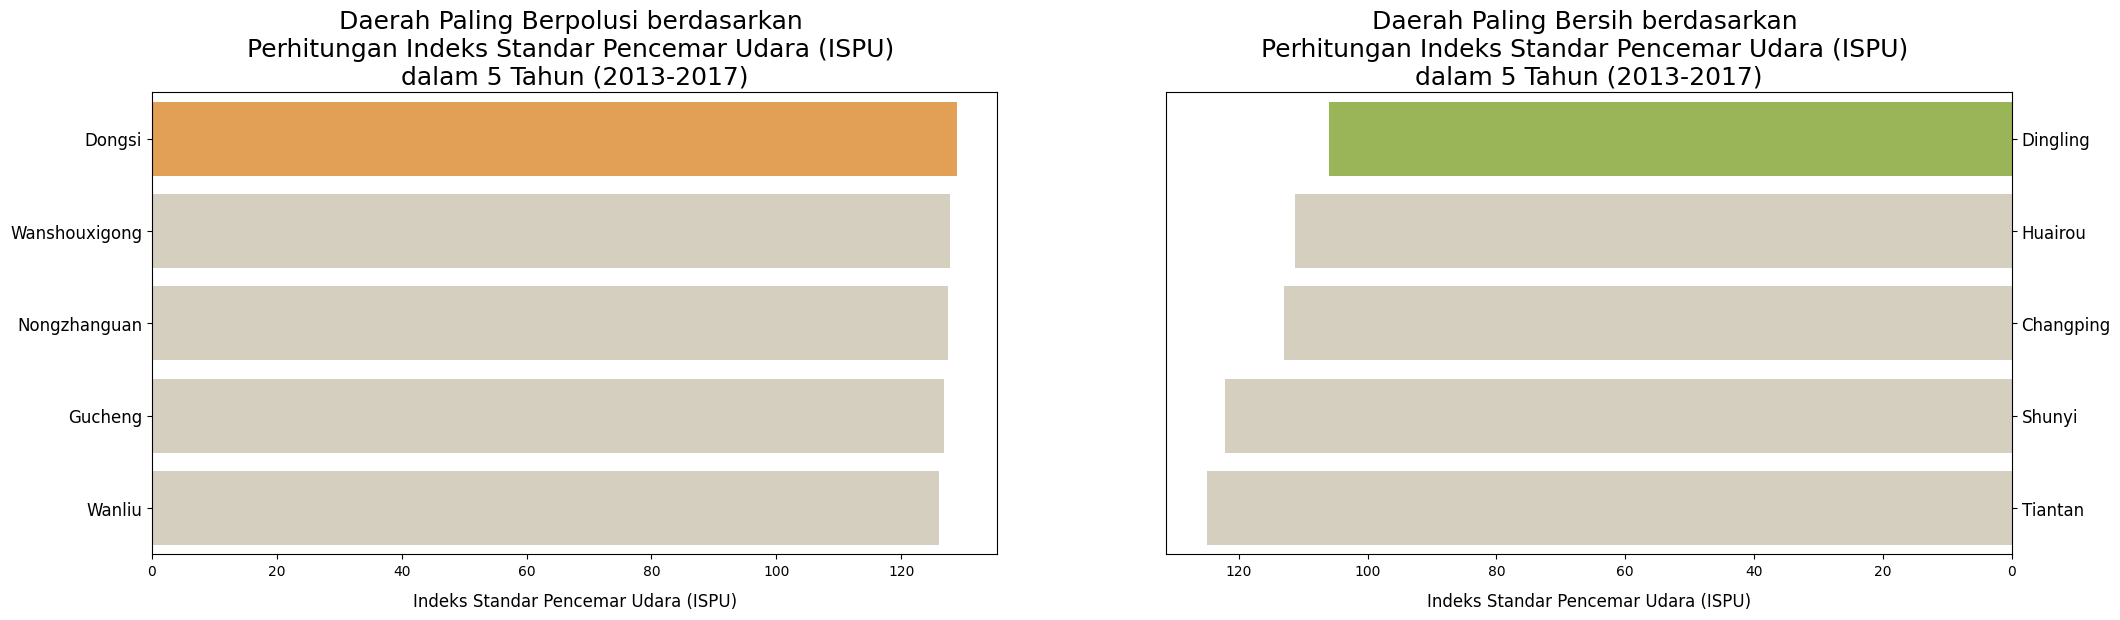

In [14]:
# Membuat bar chart 5 daerah yang paling bersih dan 5 daerah yang paling berpolusi berdasarkan ISPU
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (24, 6))

colors_min = ["#A1C349", "#D8D1BD", "#D8D1BD", "#D8D1BD", "#D8D1BD"]
colors_max = ["#F9A03F", "#D8D1BD", "#D8D1BD", "#D8D1BD", "#D8D1BD"]

sns.barplot(x = "max_ispu", y = "station", data=five_yr_avg.sort_values(by='max_ispu', ascending=False).head(5), palette=colors_max, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Indeks Standar Pencemar Udara (ISPU)", labelpad = 10, fontsize=12)
ax[0].set_title("Daerah Paling Berpolusi berdasarkan \nPerhitungan Indeks Standar Pencemar Udara (ISPU) \ndalam 5 Tahun (2013-2017)", loc="center", fontsize = 18)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x = "max_ispu", y = "station", data=five_yr_avg.sort_values(by="max_ispu", ascending=True).head(5), palette=colors_min, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Indeks Standar Pencemar Udara (ISPU)", labelpad=10, fontsize=12)
ax[1].set_title("Daerah Paling Bersih berdasarkan \nPerhitungan Indeks Standar Pencemar Udara (ISPU) \ndalam 5 Tahun (2013-2017)", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)

### Pertanyaan 2: Bagaimana tren Indeks Standar Pencemar Udara (ISPU) masing-masing polutan di setiap daerah?

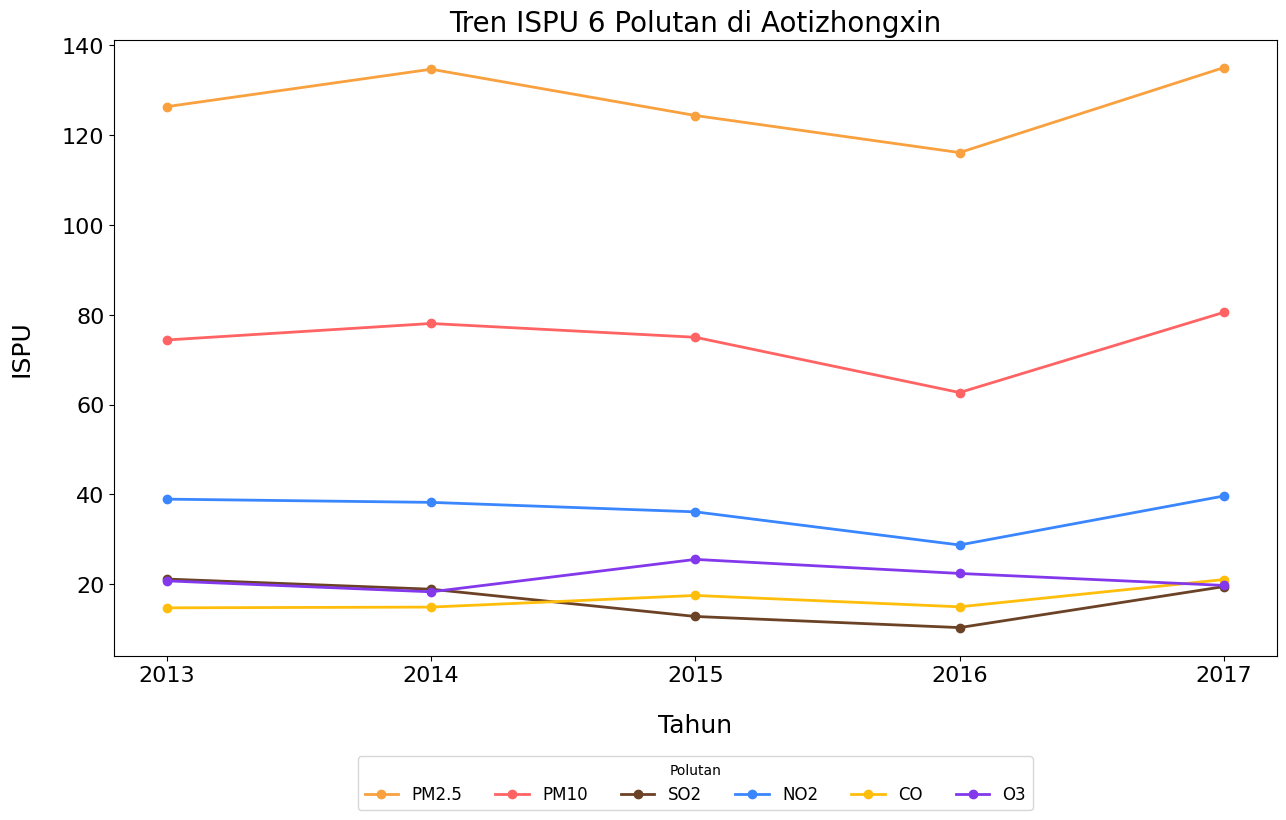

In [15]:
# Line chart tren ISPU 6 polutan di Aotizhongxin

station_name = 'Aotizhongxin'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Aotizhongxin", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

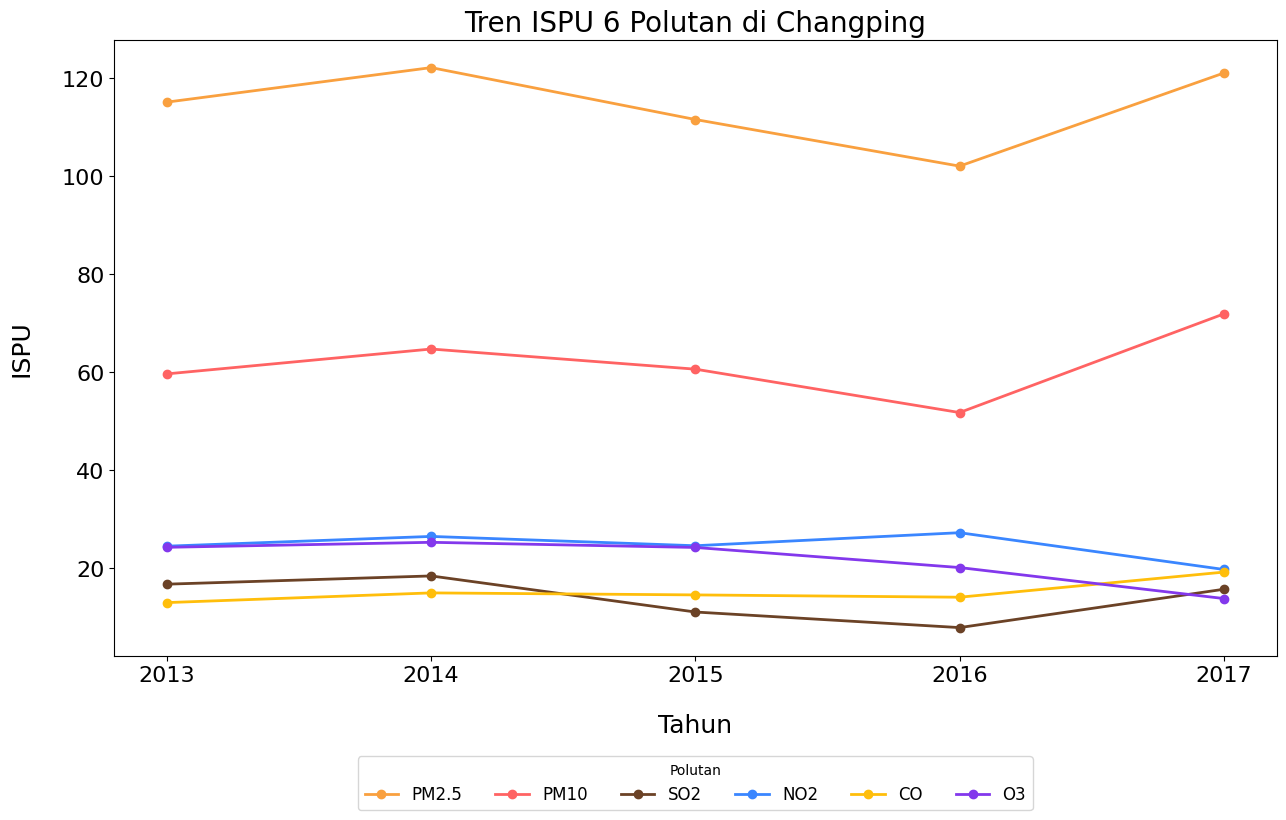

In [16]:
# Line chart tren ISPU 6 polutan di Changping

station_name = 'Changping'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Changping", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

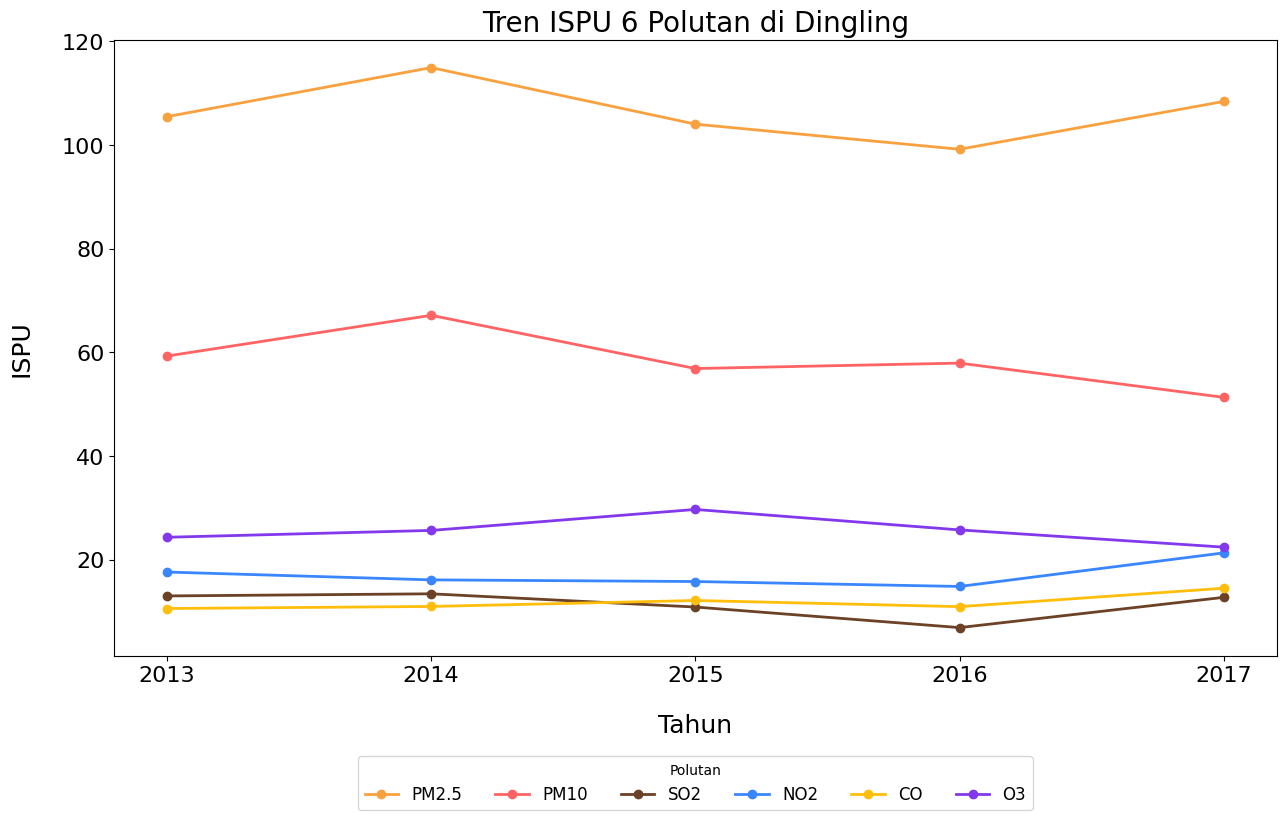

In [17]:
# Line chart tren ISPU 6 polutan di Dingling

station_name = 'Dingling'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Dingling", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

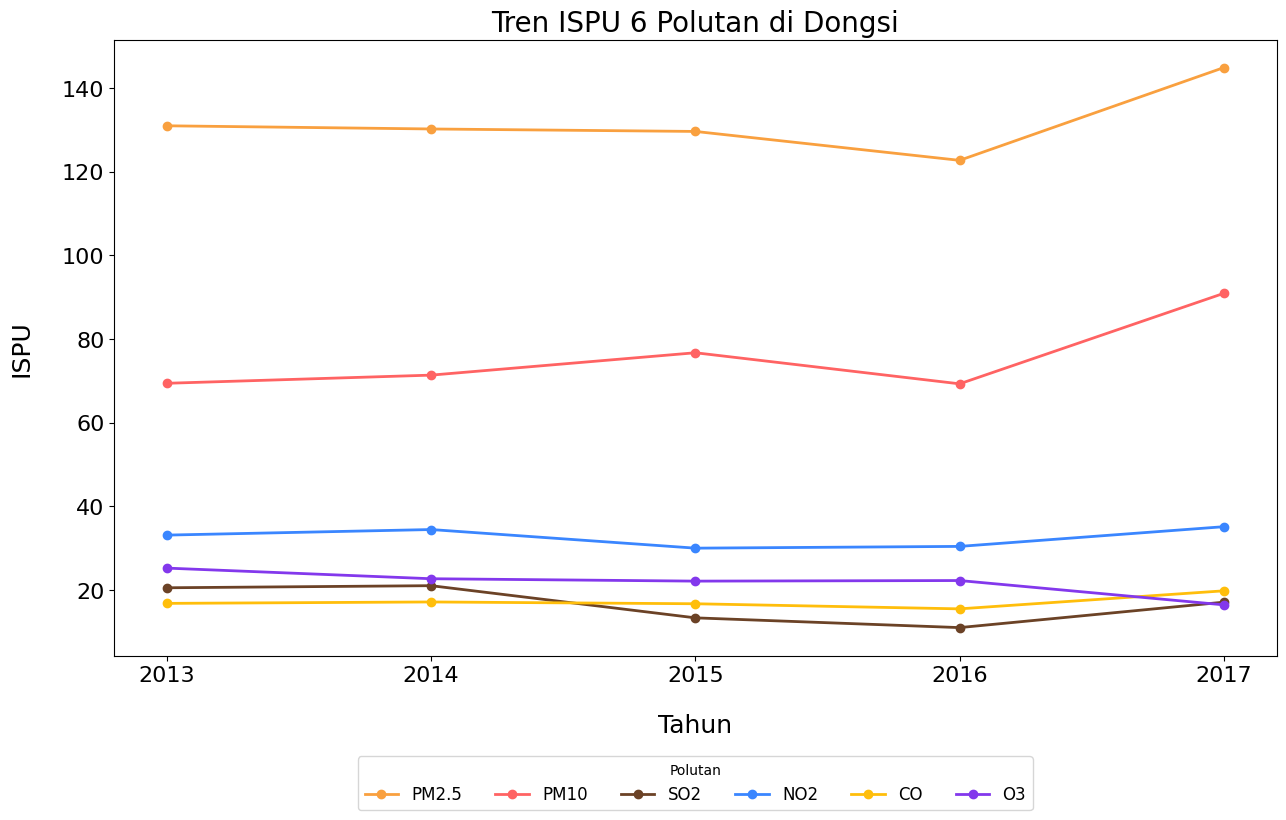

In [18]:
# Line chart tren ISPU 6 polutan di Dongsi

station_name = 'Dongsi'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Dongsi", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

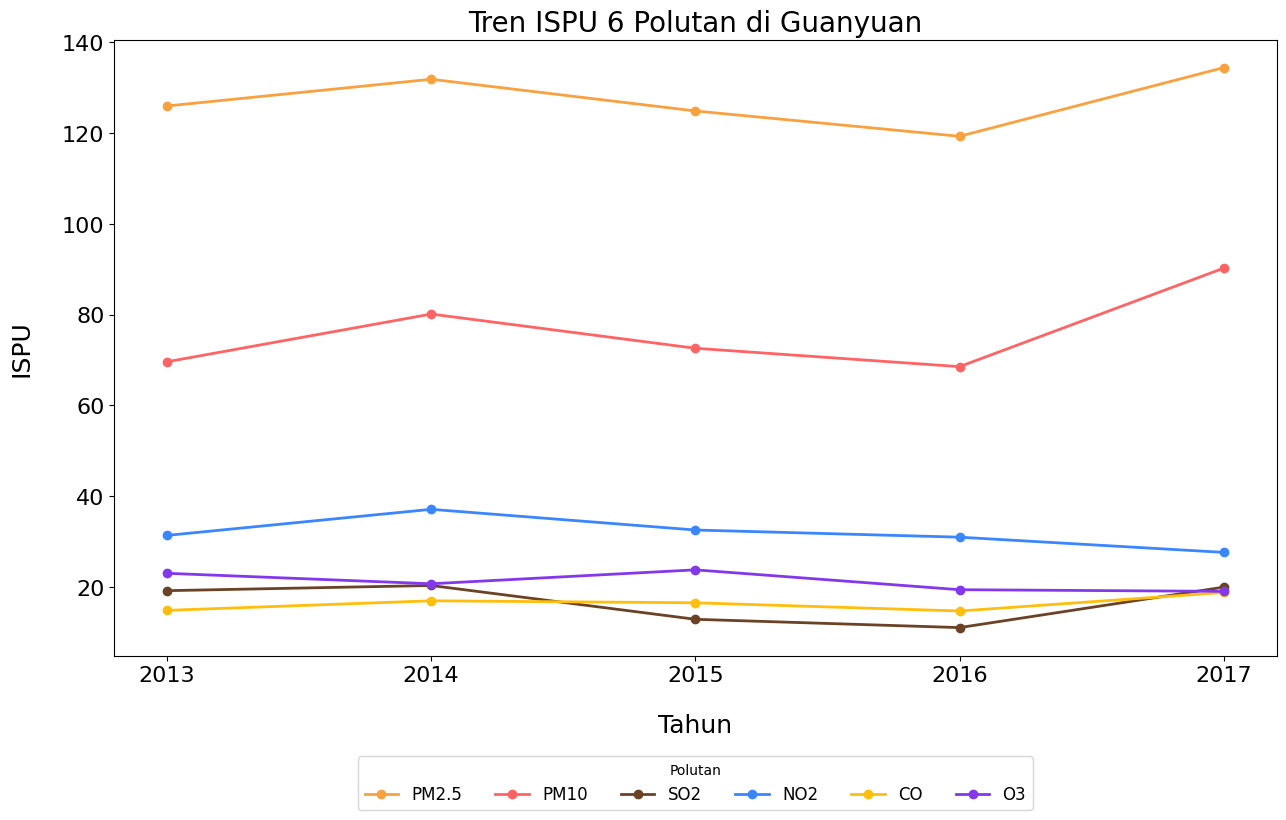

In [19]:
# Line chart tren ISPU 6 polutan di Guanyuan

station_name = 'Guanyuan'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Guanyuan", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

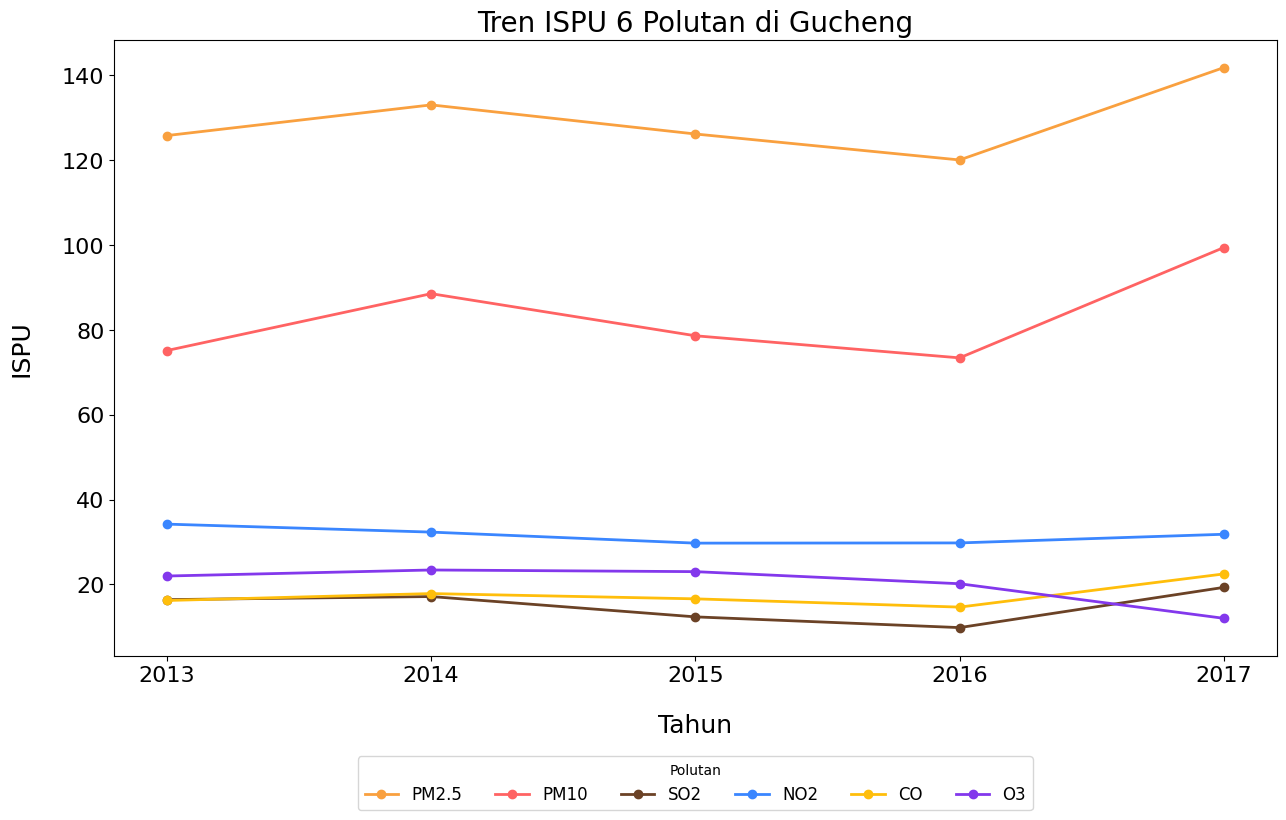

In [20]:
# Line chart tren ISPU 6 polutan di Gucheng

station_name = 'Gucheng'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Gucheng", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

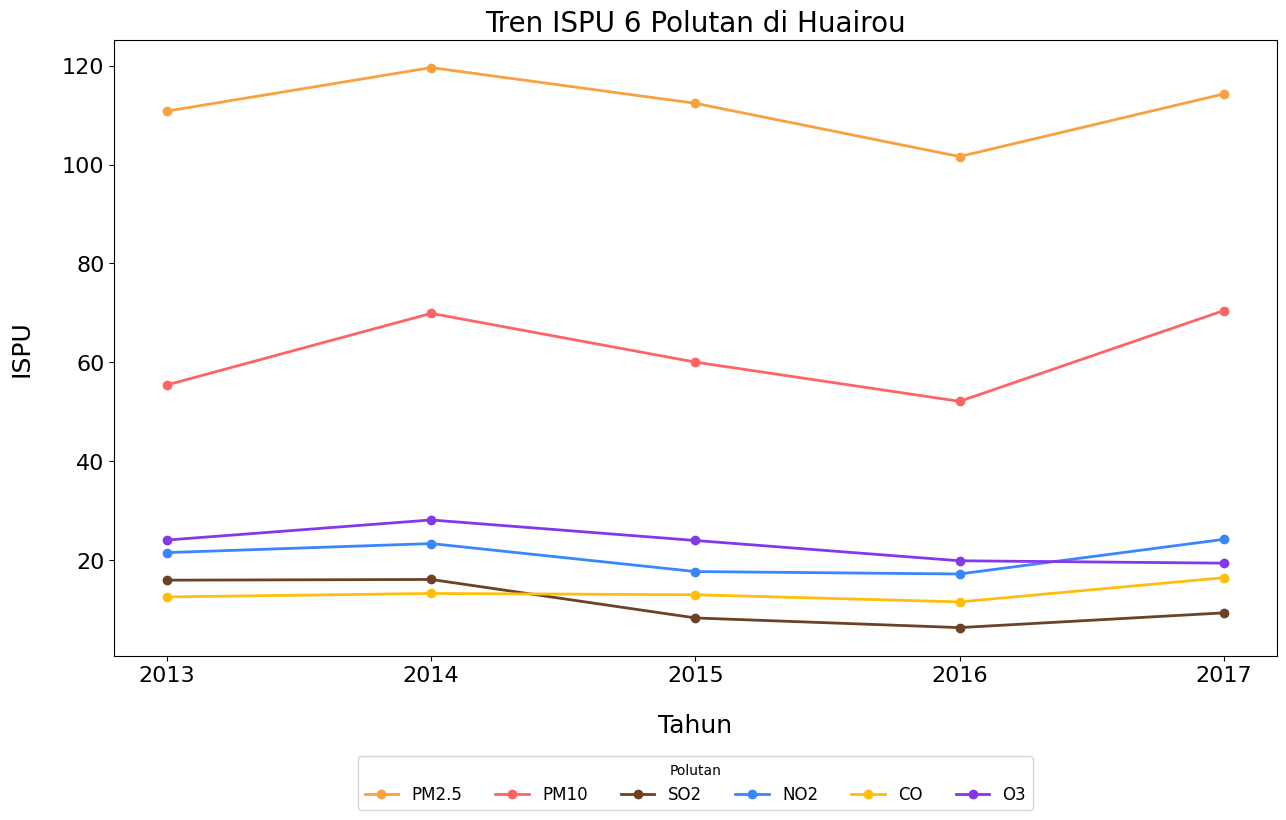

In [21]:
# Line chart tren ISPU 6 polutan di Huairou

station_name = 'Huairou'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Huairou", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

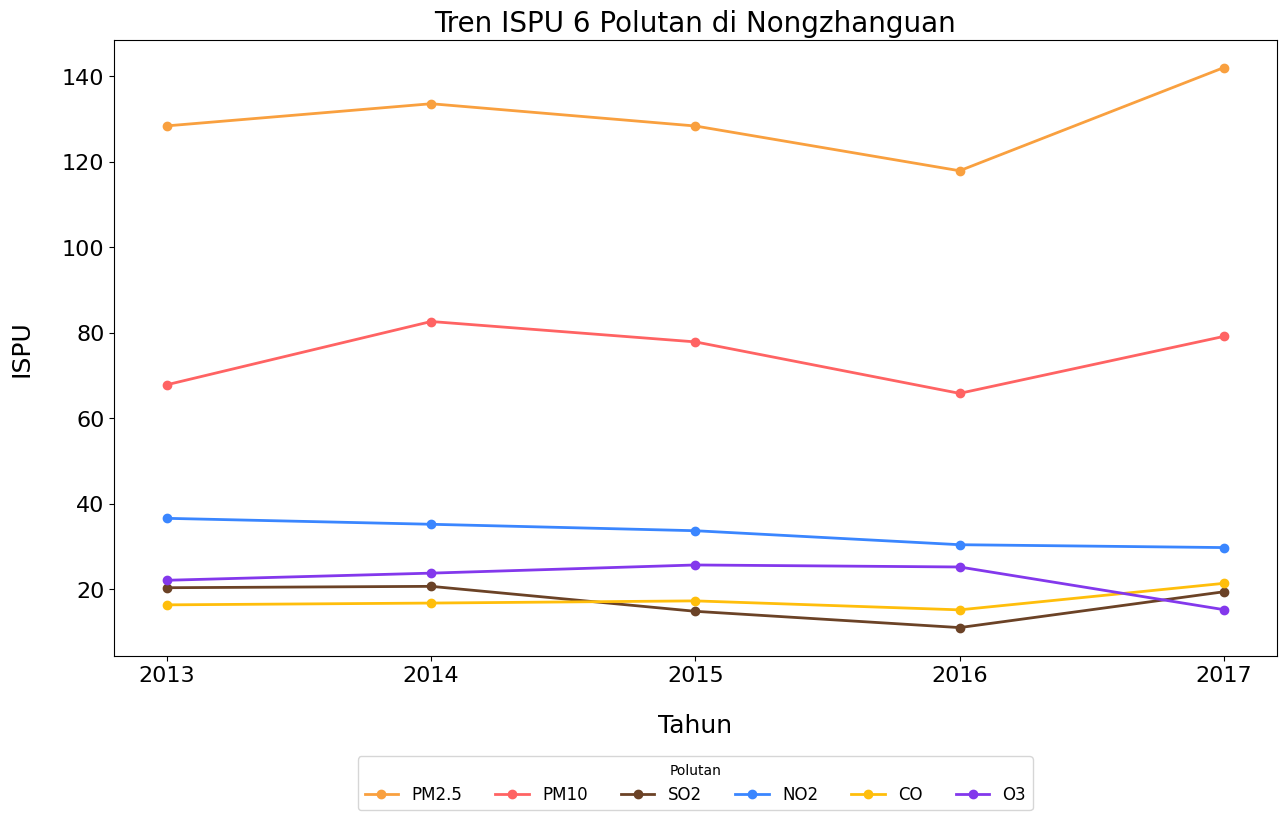

In [22]:
# Line chart tren ISPU 6 polutan di Nongzhanguan

station_name = 'Nongzhanguan'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Nongzhanguan", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

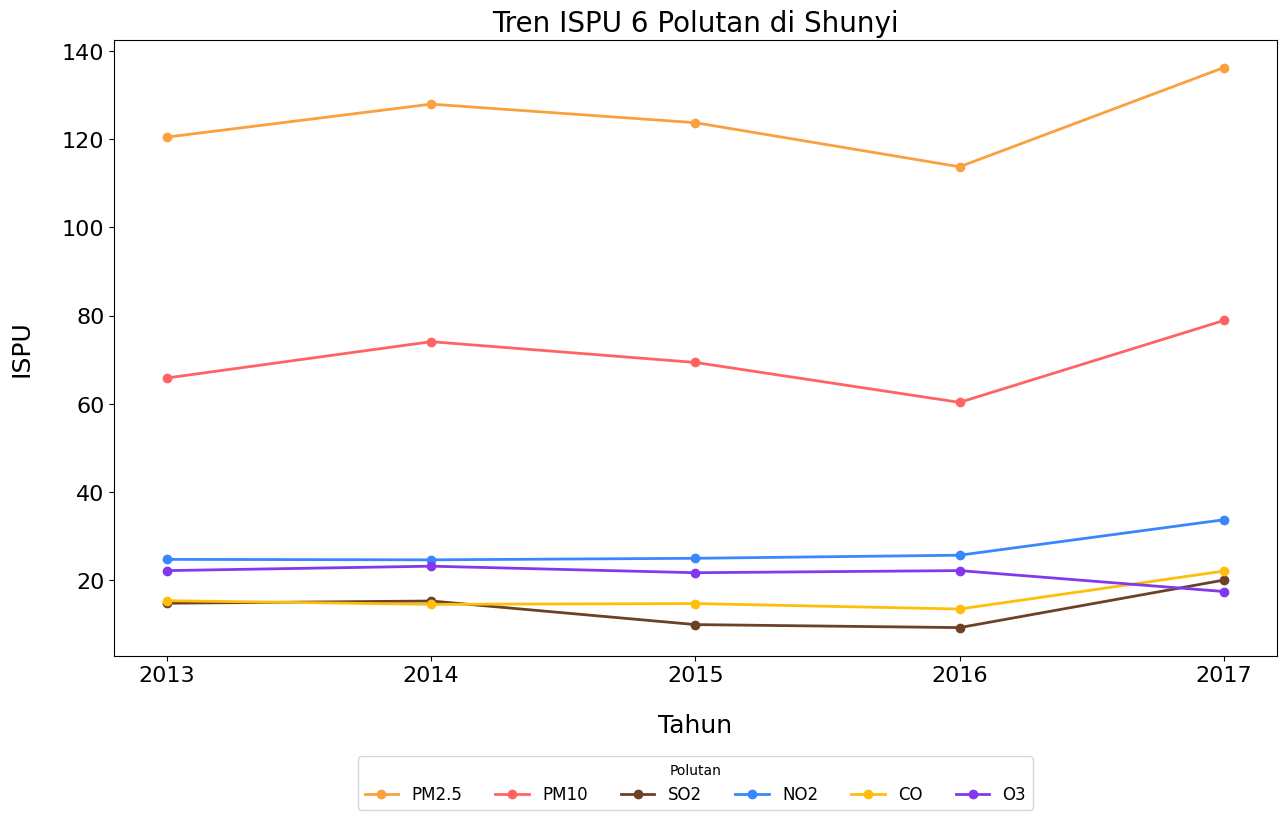

In [23]:
# Line chart tren ISPU 6 polutan di Shunyi

station_name = 'Shunyi'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Shunyi", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

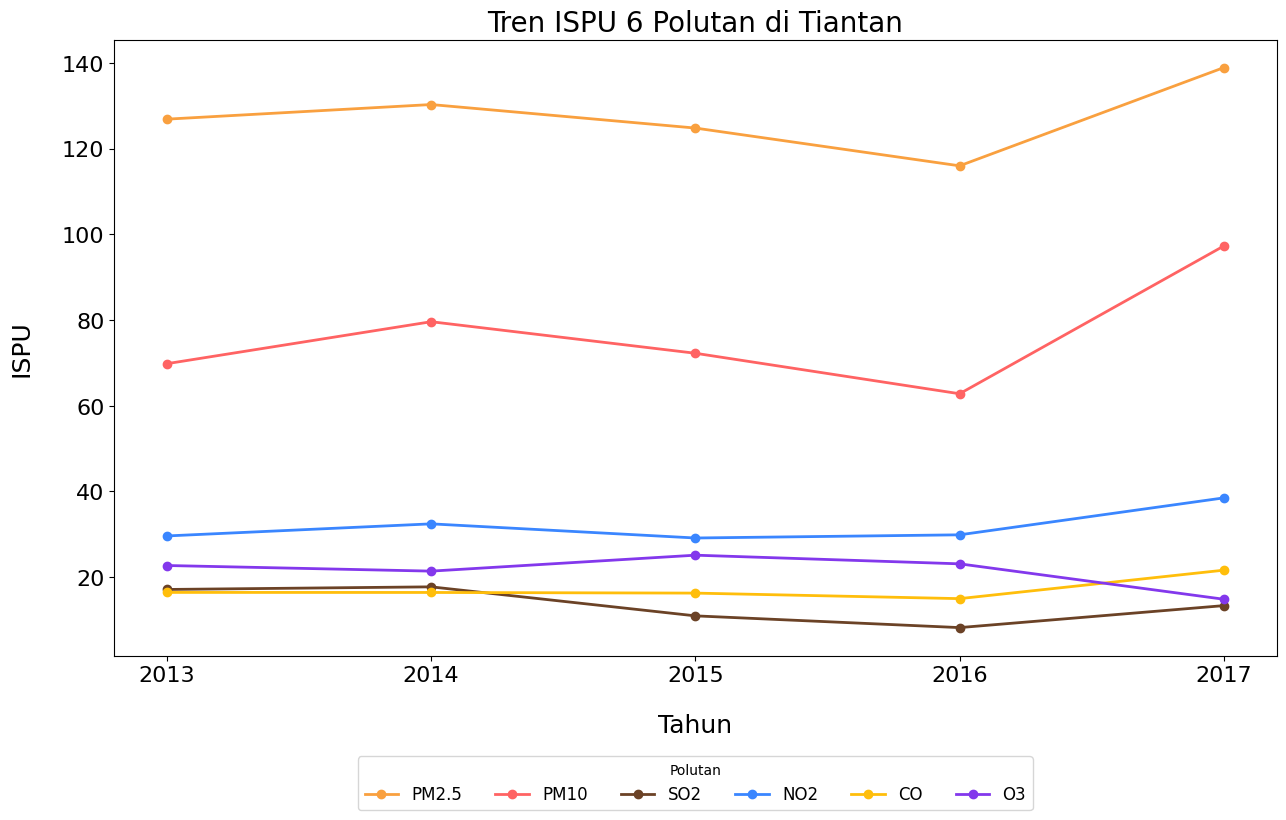

In [24]:
# Line chart tren ISPU 6 polutan di Tiantan

station_name = 'Tiantan'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Tiantan", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

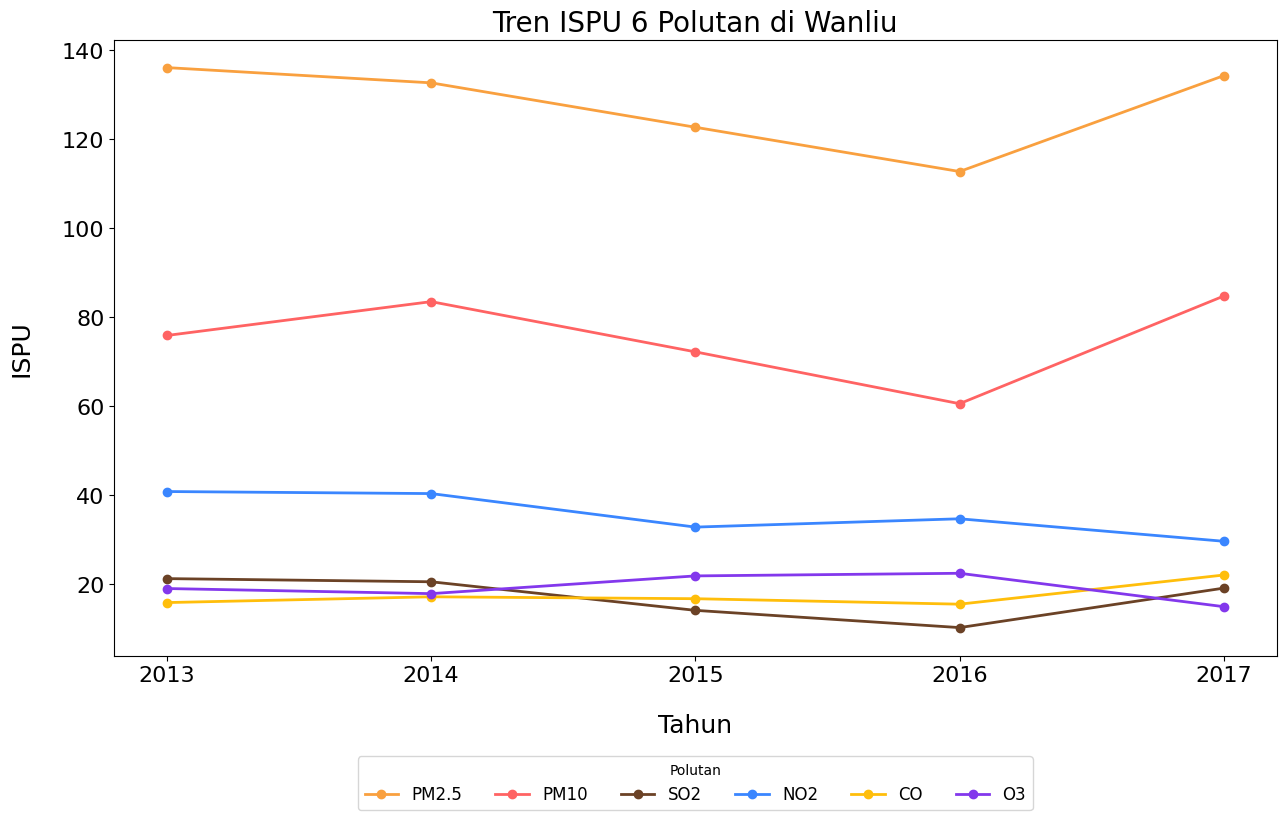

In [25]:
# Line chart tren ISPU 6 polutan di Wanliu

station_name = 'Wanliu'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Wanliu", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

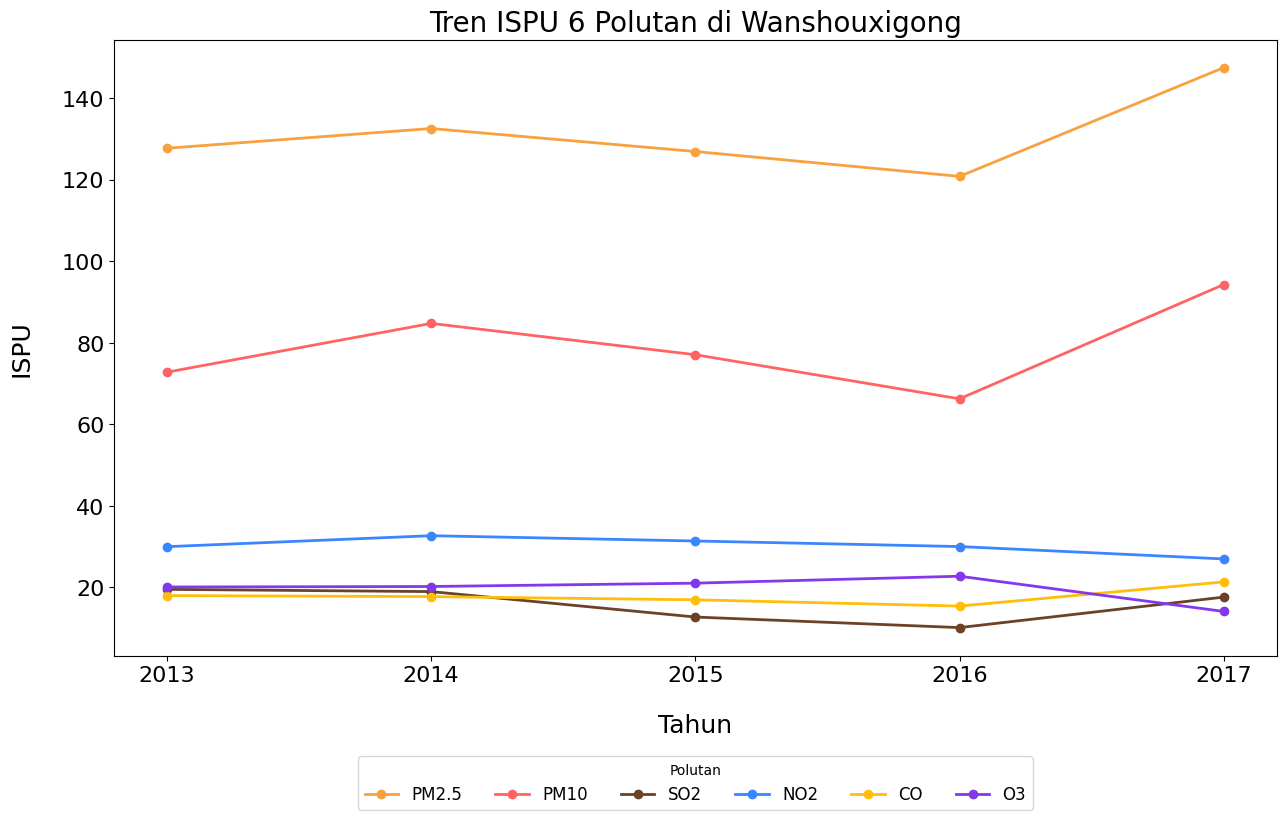

In [26]:
# Line chart tren ISPU 6 polutan di Wanshouxigong

station_name = 'Wanshouxigong'
station_data = annual_avg[annual_avg['station'] == station_name]

plt.figure(figsize=(15,8))

colors_polutant = ["#F9A03F", "#FF6363", "#6B4226", "#3A86FF", "#FFBE0B", "#8338EC"]
polutant = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

for i in range(len(polutant)):
  plt.plot(station_data['date'], station_data[polutant[i]], marker='o', label=polutant[i], color=colors_polutant[i], linewidth=2)

plt.title("Tren ISPU 6 Polutan di Wanshouxigong", loc="center", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Tahun", fontsize=18, labelpad=20)
plt.ylabel("ISPU", fontsize=18, labelpad=20)

plt.legend(title="Polutan", fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)

plt.show()

**Insight:**
- Daerah paling berpolusi berdasarkan perhitungan ISPU adalah station Dongsi dan daerah paling bersih berdasarkan perhitungan ISPU adalah station Dingling dalam 5 tahun (2013-2015).
- Perbedaan nilai ISPU antar ke-12 station tidak terlalu besar.
- Ke-12 station memiliki nilai ISPU tertinggi dalam 5 tahun (2013-2015) untuk kategori PM2.5, sedangkan paling rendah adalah untuk kategori SO2, kecuali station Nongzhanguan memiliki nilai ISPU terendah untuk kategori CO.
- Tren nilai ISPU 6 polutan di 12 station selama 5 tahun cenderung stabil berada di range yang sama.
- Kenaikan ISPU tertinggi pada 12 station berada di tahun 2016 ke 2017.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan perhitungan Indeks Standar Pencemar Udara (ISPU) dalam 5 tahun (2013-2017), daerah yang paling bersih adalah station Dingling, sedangkan daerah yang paling berpolusi adalah station Dongsi.
- Tren Indeks Standar Pencemar Udara (ISPU) masing-masing polutan di setiap daerah menunjukan nilai ISPU yang cenderung stabil dengan kenaikan tertinggi pada tahun 2017, serta polutan yang memiliki nilai ISPU tinggi adalah PM2.5 dan nilai ISPU rendah adalah SO2 dan CO.